Overview of four scaling methods offered by mglearn :

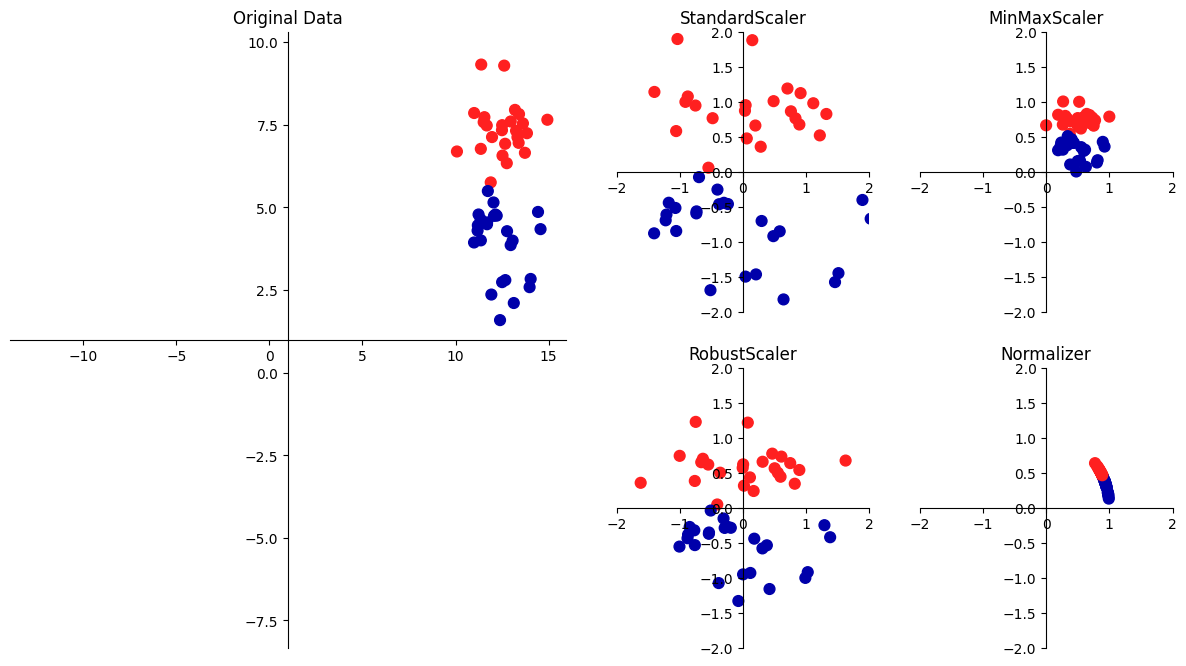

In [1]:
import mglearn
mglearn.plots.plot_scaling()

Use fish data from sklearn.datasets :

In [2]:
import numpy as np

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [3]:
# prepare target data; 0: bream & 1: smelt
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

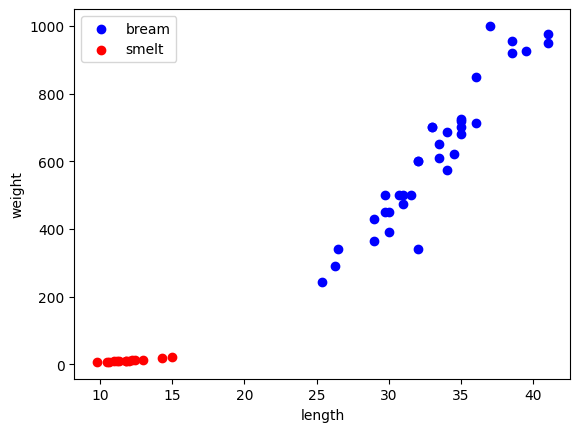

In [4]:
# plot fish_data
import matplotlib.pyplot as plt
plt.scatter(fish_length[:35], fish_weight[:35], color='blue')
plt.scatter(fish_length[35:], fish_weight[35:], color='red')
plt.legend(['bream','smelt'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
# check their dimension
print(fish_data.shape, train_input.shape, test_input.shape)
print(fish_data.shape, train_target.shape, test_target.shape)

(49, 2) (36, 2) (13, 2)
(49, 2) (36,) (13,)


In [6]:
# different ways to scale data
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, QuantileTransformer, PowerTransformer

std_scaler = StandardScaler()
std_scaler.fit(fish_data)
std_train = std_scaler.transform(fish_data)

rb_scaler = RobustScaler()
rb_scaler.fit(fish_data)
rb_train = rb_scaler.transform(fish_data)

mm_scaler = MinMaxScaler()
mm_scaler.fit(fish_data)
mm_train = mm_scaler.transform(fish_data)

norm_scaler = Normalizer()
norm_scaler.fit(fish_data)
norm_train = norm_scaler.transform(fish_data)

qt_scaler = QuantileTransformer(output_distribution='normal',n_quantiles=10)
qt_scaler.fit(fish_data)
qt_train = qt_scaler.transform(fish_data)

pw_scaler = PowerTransformer(method='box-cox') # choose either box-cox or yeo-johnson
pw_scaler.fit(fish_data)
pw_train = pw_scaler.transform(fish_data)

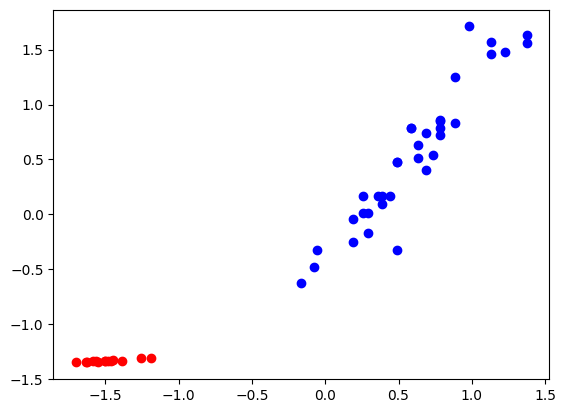

In [7]:
plt.scatter(std_train[:,0][:35], std_train[:,1][:35], color='blue')
plt.scatter(std_train[:,0][35:], std_train[:,1][35:], color='red')

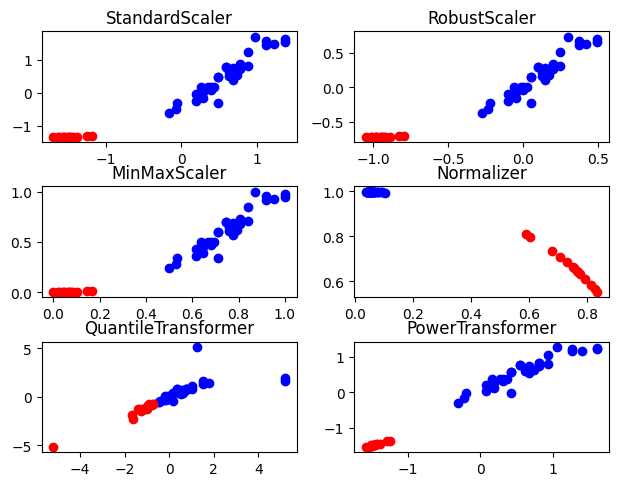

In [8]:
fig, axs = plt.subplots(3,2)
fig.tight_layout()
# StandardScaler, RobustScaler, MinMaxScaler, Normalizer, QuantileTransformer, PowerTransformer
axs[0,0].scatter(std_train[:,0][:35], std_train[:,1][:35], color='blue')
axs[0,0].scatter(std_train[:,0][35:], std_train[:,1][35:], color='red')
axs[0,0].set(title='StandardScaler')

axs[0,1].scatter(rb_train[:,0][:35], rb_train[:,1][:35], color='blue')
axs[0,1].scatter(rb_train[:,0][35:], rb_train[:,1][35:], color='red')
axs[0,1].set(title='RobustScaler')

axs[1,0].scatter(mm_train[:,0][:35], mm_train[:,1][:35], color='blue')
axs[1,0].scatter(mm_train[:,0][35:], mm_train[:,1][35:], color='red')
axs[1,0].set(title='MinMaxScaler')

axs[1,1].scatter(norm_train[:,0][:35], norm_train[:,1][:35], color='blue')
axs[1,1].scatter(norm_train[:,0][35:], norm_train[:,1][35:], color='red')
axs[1,1].set(title='Normalizer')

axs[2,0].scatter(qt_train[:,0][:35], qt_train[:,1][:35], color='blue')
axs[2,0].scatter(qt_train[:,0][35:], qt_train[:,1][35:], color='red')
axs[2,0].set(title='QuantileTransformer')

axs[2,1].scatter(pw_train[:,0][:35], pw_train[:,1][:35], color='blue')
axs[2,1].scatter(pw_train[:,0][35:], pw_train[:,1][35:], color='red')
axs[2,1].set(title='PowerTransformer')

plt.show()

Add outliers to the original dataset to compare the sensitivity of different scaling methods to outliers

In [24]:
fish_length_outliers = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0,20,20,10]
fish_weight_outliers = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9,200,1000,500]
fish_data_outliers = np.column_stack((fish_length_outliers, fish_weight_outliers))
fish_data_outliers[-3:]

array([[  20.,  200.],
       [  20., 1000.],
       [  10.,  500.]])

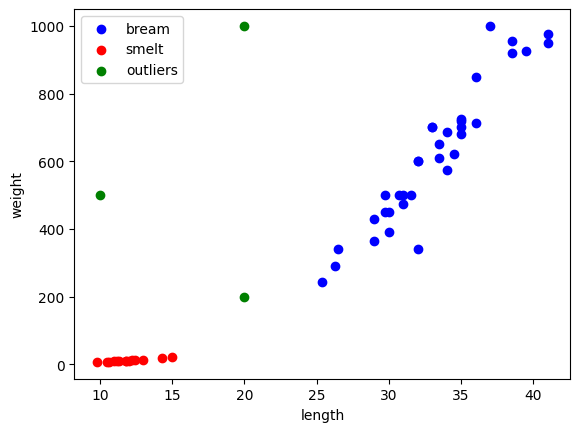

In [25]:
plt.scatter(fish_data_outliers[:,0][:35], fish_data_outliers[:,1][:35], color='blue')
plt.scatter(fish_data_outliers[:,0][35:-3], fish_data_outliers[:,1][35:-3], color='red')
plt.scatter(fish_data_outliers[:,0][-3:], fish_data_outliers[:,1][-3:], color='green')
plt.legend(['bream','smelt','outliers'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
# different ways to scale data
std_scaler = StandardScaler()
std_scaler.fit(fish_data_outliers)
std_train_outliers = std_scaler.transform(fish_data_outliers)

rb_scaler = RobustScaler()
rb_scaler.fit(fish_data_outliers)
rb_train_outliers = rb_scaler.transform(fish_data_outliers)

mm_scaler = MinMaxScaler()
mm_scaler.fit(fish_data_outliers)
mm_train_outliers = mm_scaler.transform(fish_data_outliers)

norm_scaler = Normalizer()
norm_scaler.fit(fish_data_outliers)
norm_train_outliers = norm_scaler.transform(fish_data_outliers)

qt_scaler = QuantileTransformer(output_distribution='normal',n_quantiles=10)
qt_scaler.fit(fish_data_outliers)
qt_train_outliers = qt_scaler.transform(fish_data_outliers)

pw_scaler = PowerTransformer(method='box-cox') # choose either box-cox or yeo-johnson
pw_scaler.fit(fish_data_outliers)
pw_train_outliers = pw_scaler.transform(fish_data_outliers)

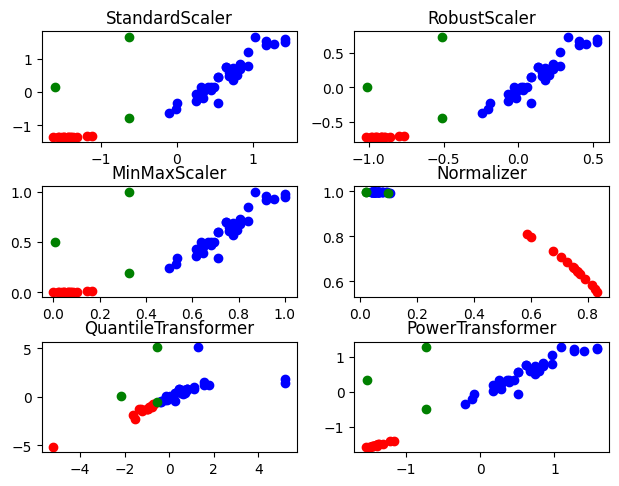

In [28]:
fig, axs = plt.subplots(3,2)
fig.tight_layout()
# StandardScaler, RobustScaler, MinMaxScaler, Normalizer, QuantileTransformer, PowerTransformer
axs[0,0].scatter(std_train_outliers[:,0][:35], std_train_outliers[:,1][:35], color='blue')
axs[0,0].scatter(std_train_outliers[:,0][35:-3], std_train_outliers[:,1][35:-3], color='red')
axs[0,0].scatter(std_train_outliers[:,0][-3:], std_train_outliers[:,1][-3:], color='green')
axs[0,0].set(title='StandardScaler')

axs[0,1].scatter(rb_train_outliers[:,0][:35], rb_train_outliers[:,1][:35], color='blue')
axs[0,1].scatter(rb_train_outliers[:,0][35:-3], rb_train_outliers[:,1][35:-3], color='red')
axs[0,1].scatter(rb_train_outliers[:,0][-3:], rb_train_outliers[:,1][-3:], color='green')
axs[0,1].set(title='RobustScaler')

axs[1,0].scatter(mm_train_outliers[:,0][:35], mm_train_outliers[:,1][:35], color='blue')
axs[1,0].scatter(mm_train_outliers[:,0][35:-3], mm_train_outliers[:,1][35:-3], color='red')
axs[1,0].scatter(mm_train_outliers[:,0][-3:], mm_train_outliers[:,1][-3:], color='green')
axs[1,0].set(title='MinMaxScaler')

axs[1,1].scatter(norm_train_outliers[:,0][:35], norm_train_outliers[:,1][:35], color='blue')
axs[1,1].scatter(norm_train_outliers[:,0][35:-3], norm_train_outliers[:,1][35:-3], color='red')
axs[1,1].scatter(norm_train_outliers[:,0][-3:], norm_train_outliers[:,1][-3:], color='green')
axs[1,1].set(title='Normalizer')

axs[2,0].scatter(qt_train_outliers[:,0][:35], qt_train_outliers[:,1][:35], color='blue')
axs[2,0].scatter(qt_train_outliers[:,0][35:-3], qt_train_outliers[:,1][35:-3], color='red')
axs[2,0].scatter(qt_train_outliers[:,0][-3:], qt_train_outliers[:,1][-3:], color='green')
axs[2,0].set(title='QuantileTransformer')

axs[2,1].scatter(pw_train_outliers[:,0][:35], pw_train_outliers[:,1][:35], color='blue')
axs[2,1].scatter(pw_train_outliers[:,0][35:-3], pw_train_outliers[:,1][35:-3], color='red')
axs[2,1].scatter(pw_train_outliers[:,0][-3:], pw_train_outliers[:,1][-3:], color='green')
axs[2,1].set(title='PowerTransformer')

plt.show()